In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
proj1=pd.read_csv("TNPLTY.csv")

In [3]:
proj1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,197.850006,197.850006,190.300003,194.500000,155.126770,34370
1,2019-06-04,197.199997,197.199997,192.000000,192.699997,153.691132,33544
2,2019-06-06,194.000000,194.000000,188.800003,189.399994,151.059158,26725
3,2019-06-07,189.000000,191.750000,187.300003,189.750000,151.338333,19424
4,2019-06-10,193.000000,193.000000,184.899994,187.399994,149.464050,242607


In [4]:
proj1.shape

(742, 7)

In [5]:
proj1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
proj1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       742 non-null    object 
 1   Open       742 non-null    float64
 2   High       742 non-null    float64
 3   Low        742 non-null    float64
 4   Close      742 non-null    float64
 5   Adj Close  742 non-null    float64
 6   Volume     742 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.7+ KB


In [7]:
proj1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,742.000000,742.000000,742.000000,742.000000,742.000000,7.420000e+02
mean,144.060647,146.816374,141.093127,143.489420,131.646386,3.042908e+05
std,31.683493,32.179133,30.835094,31.485940,28.243297,4.628557e+05
min,88.000000,89.400002,86.500000,87.250000,75.184265,6.790000e+03
25%,121.000000,123.037500,118.262501,120.912501,110.798666,7.534600e+04
50%,136.449997,139.050003,134.849998,136.250000,132.193863,1.467415e+05
75%,172.649994,174.812504,168.075005,171.062504,147.148388,3.234042e+05
max,225.000000,226.949997,216.500000,223.750000,223.750000,4.005590e+06


In [8]:
proj1.drop('Adj Close',axis =1,inplace=True)

In [9]:
proj1.head()

,Date,Open,High,Low,Close,Volume
0,2019-06-03,197.850006,197.850006,190.300003,194.500000,34370
1,2019-06-04,197.199997,197.199997,192.000000,192.699997,33544
2,2019-06-06,194.000000,194.000000,188.800003,189.399994,26725
3,2019-06-07,189.000000,191.750000,187.300003,189.750000,19424
4,2019-06-10,193.000000,193.000000,184.899994,187.399994,242607


In [10]:
print(proj1)

           Date        Open        High         Low       Close  Volume
0    2019-06-03  197.850006  197.850006  190.300003  194.500000   34370
1    2019-06-04  197.199997  197.199997  192.000000  192.699997   33544
2    2019-06-06  194.000000  194.000000  188.800003  189.399994   26725
3    2019-06-07  189.000000  191.750000  187.300003  189.750000   19424
4    2019-06-10  193.000000  193.000000  184.899994  187.399994  242607
..          ...         ...         ...         ...         ...     ...
737  2022-05-25  177.250000  179.600006  166.149994  171.250000  850196
738  2022-05-26  173.300003  178.449997  166.000000  174.800003  485668
739  2022-05-27  176.050003  179.000000  170.550003  172.199997  253387
740  2022-05-30  174.399994  183.750000  174.350006  182.250000  323483
741  2022-05-31  180.500000  185.100006  179.000000  180.100006  295385

[742 rows x 6 columns]


In [11]:
proj=proj1.iloc[:,1:7]

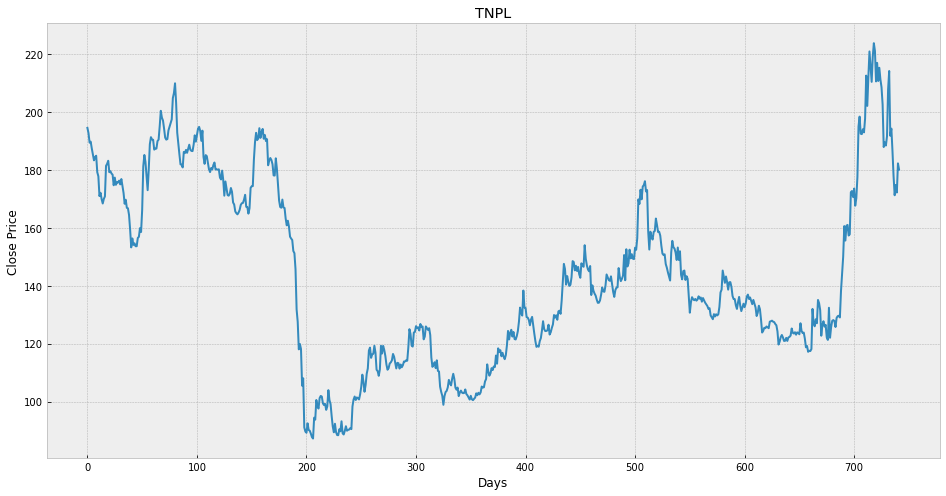

In [12]:
plt.figure(figsize=(16,8))
plt.title('TNPL')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(proj['Close'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


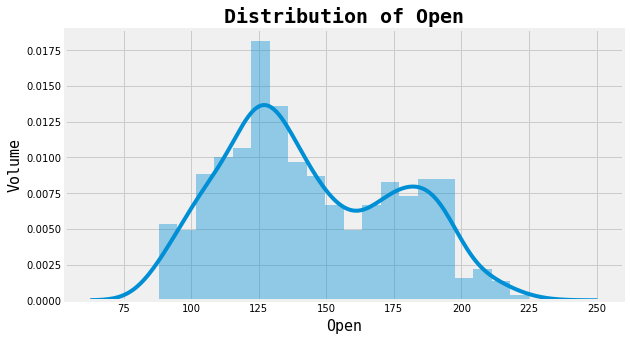

In [13]:
Open = proj1['Open'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(proj1['Open'], bins=20)
plt.title('Distribution of Open', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Open', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Volume', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


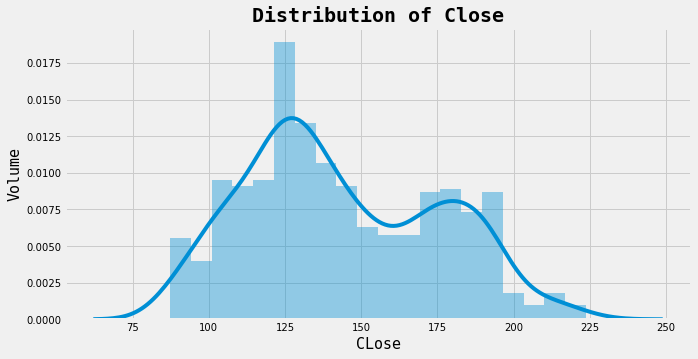

In [14]:
Close = proj1['Close'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(proj1['Close'], bins=20)
plt.title('Distribution of Close', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('CLose', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Volume', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


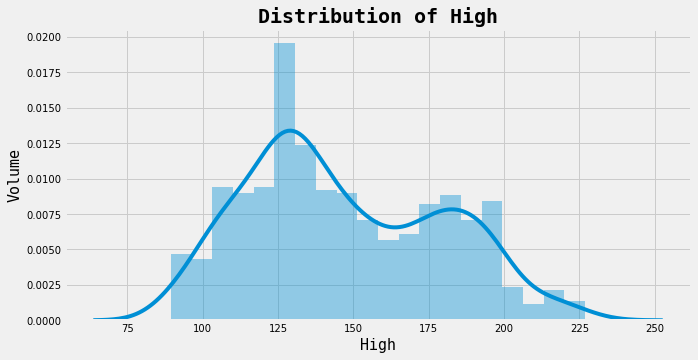

In [15]:
High = proj1['High'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(proj1['High'], bins=20)
plt.title('Distribution of High', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('High', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Volume', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


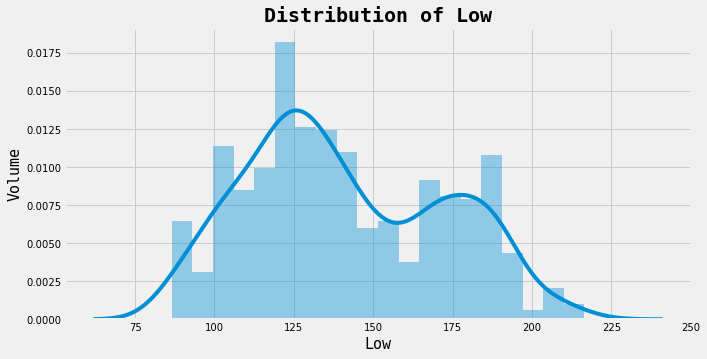

In [16]:
Low = proj1['Low'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(proj1['Low'], bins=20)
plt.title('Distribution of Low', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Low', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Volume', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

In [17]:
proj = proj[['Close']]
proj.head(5)

,Close
0,194.500000
1,192.699997
2,189.399994
3,189.750000
4,187.399994


In [18]:
future_days = 10

In [19]:
proj['Prediction'] = proj[['Close']].shift(-future_days)
proj.head(5)

,Close,Prediction
0,194.500000,177.800003
1,192.699997,170.949997
2,189.399994,172.100006
3,189.750000,169.850006
4,187.399994,168.399994


In [20]:
X =np.array(proj.drop(['Prediction'],1))[:-future_days]
print(X)

[[194.5     ]
 [192.699997]
 [189.399994]
 [189.75    ]
 [187.399994]
 [185.399994]
 [183.300003]
 [184.399994]
 [184.899994]
 [179.199997]
 [177.800003]
 [170.949997]
 [172.100006]
 [169.850006]
 [168.399994]
 [170.      ]
 [170.850006]
 [181.399994]
 [182.100006]
 [183.149994]
 [179.199997]
 [179.550003]
 [178.75    ]
 [178.350006]
 [174.699997]
 [177.350006]
 [174.850006]
 [175.75    ]
 [175.649994]
 [176.300003]
 [175.      ]
 [176.850006]
 [174.350006]
 [172.050003]
 [168.300003]
 [169.699997]
 [166.899994]
 [166.75    ]
 [164.449997]
 [159.399994]
 [153.25    ]
 [156.350006]
 [154.100006]
 [154.649994]
 [153.649994]
 [153.649994]
 [156.5     ]
 [156.899994]
 [159.899994]
 [158.550003]
 [166.199997]
 [181.25    ]
 [185.149994]
 [182.75    ]
 [178.      ]
 [173.      ]
 [180.199997]
 [188.899994]
 [191.300003]
 [190.5     ]
 [190.399994]
 [187.      ]
 [187.350006]
 [187.350006]
 [189.949997]
 [190.449997]
 [195.050003]
 [200.399994]
 [198.050003]
 [197.050003]
 [194.25    ]
 [191.

In [21]:
y =np.array(proj['Prediction'])[:-future_days]
print(y)

[177.800003 170.949997 172.100006 169.850006 168.399994 170.
 170.850006 181.399994 182.100006 183.149994 179.199997 179.550003
 178.75     178.350006 174.699997 177.350006 174.850006 175.75
 175.649994 176.300003 175.       176.850006 174.350006 172.050003
 168.300003 169.699997 166.899994 166.75     164.449997 159.399994
 153.25     156.350006 154.100006 154.649994 153.649994 153.649994
 156.5      156.899994 159.899994 158.550003 166.199997 181.25
 185.149994 182.75     178.       173.       180.199997 188.899994
 191.300003 190.5      190.399994 187.       187.350006 187.350006
 189.949997 190.449997 195.050003 200.399994 198.050003 197.050003
 194.25     191.149994 190.449997 190.649994 193.649994 194.949997
 196.300003 197.449997 204.800003 206.550003 209.899994 203.100006
 192.850006 188.899994 185.350006 181.899994 181.800003 180.850006
 186.199997 185.800003 186.899994 185.899994 187.300003 188.699997
 186.949997 186.550003 186.5      188.75     191.949997 189.75
 192.       1

In [ ]:
# ML Model

In [22]:
rid=Ridge(alpha =10.3)

In [23]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.10, random_state=100)

In [24]:
rid.fit(x_train,y_train)
svr = SVR().fit(x_train,y_train)
lr = LinearRegression().fit(x_train, y_train)

In [25]:
x_future=proj.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[210.699997],
       [215.25    ],
       [211.199997],
       [208.550003],
       [202.600006],
       [187.899994],
       [189.5     ],
       [188.399994],
       [191.550003],
       [207.699997]])

In [26]:
svr_prediction = svr.predict(x_future)# SVR
print(svr_prediction)
lr_prediction= lr.predict(x_future) #Linear Regression
print(lr_prediction)
rid_prediction=rid.predict(x_future) # Ridge Regression
print(rid_prediction)

[178.41338253 175.28535658 178.10267608 179.64038511 181.96714539
 179.83413089 180.6001899  180.08594635 181.40588104 180.07323892]
[204.86697862 209.03038191 205.32449516 202.89966297 197.45521884
 184.00422147 185.4682799  184.46173802 187.34410048 202.12187936]
[204.86598961 209.02932658 205.32349887 202.89870531 197.45434792
 184.00356485 185.46759996 184.4610741  187.34339064 202.12093408]


<ipython-input-27-8fd5a992e02f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


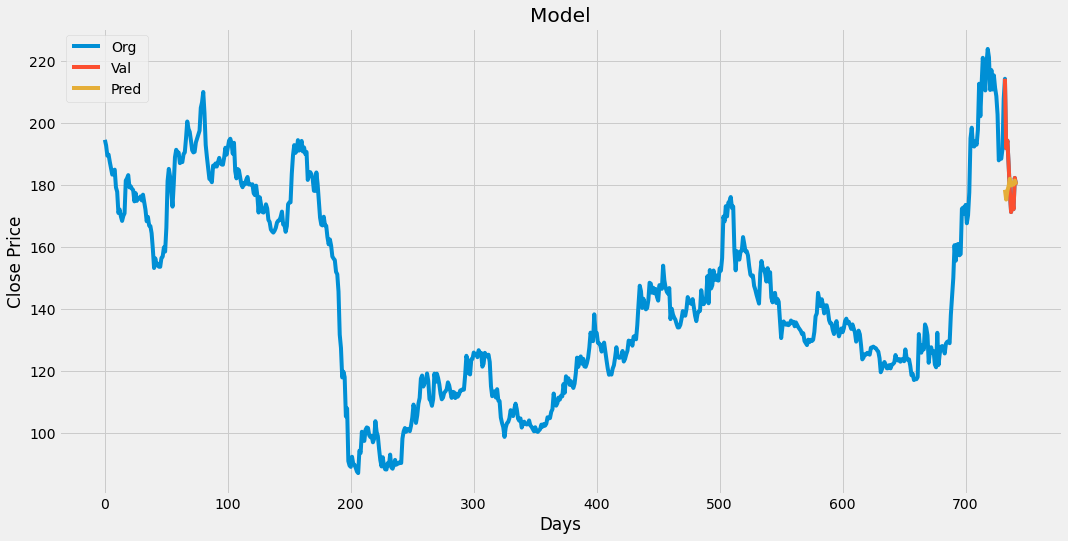

In [27]:
predictions=svr_prediction

valid=proj[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(proj['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Org','Val','Pred'])
plt.show()

<ipython-input-28-f8cdafddffa2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


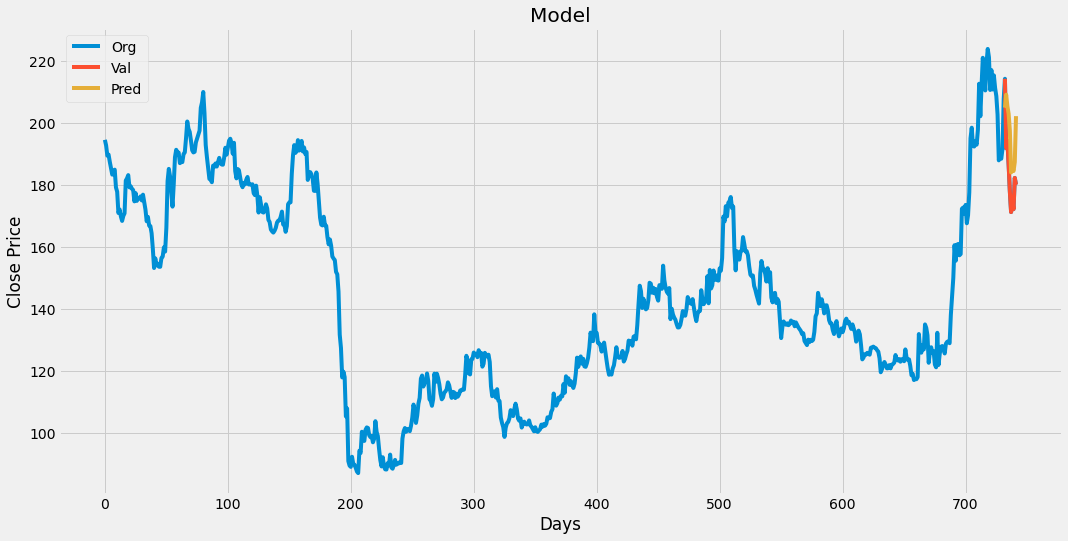

In [28]:
predictions=lr_prediction

valid=proj[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(proj['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Org','Val','Pred'])
plt.show()

<ipython-input-29-5c3b1ccf20c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


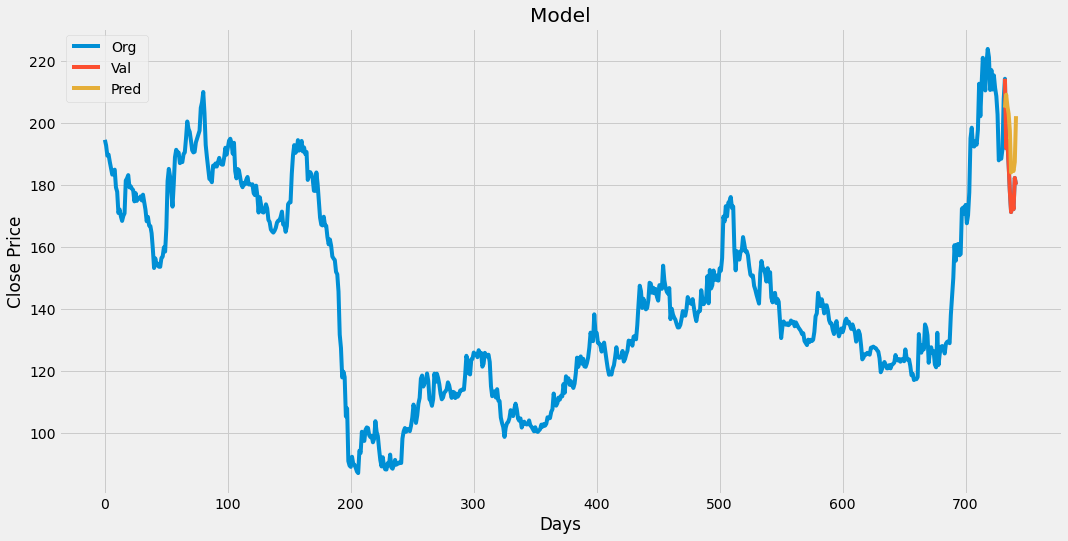

In [29]:
predictions=rid_prediction

valid=proj[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(proj['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Org','Val','Pred'])
plt.show()

In [30]:
svr.score(x_test,y_test)

0.7703632025387742

In [31]:
lr.score(x_test,y_test)

0.7910039084110629

In [32]:
rid.score(x_test,y_test)

0.791004688445758

In [ ]:
#Model

In [60]:
from sklearn.pipeline import Pipeline

#Creating the model
import joblib
model_file = open("linear.pkl","wb")
joblib.dump(lr,model_file)
model_file.close()

model_svr=open("modelsvr.pkl","wb")
joblib.dump(svr,model_svr)
model_svr.close()

model_rig=open("modelridge.pkl","wb")
joblib.dump(rid,model_rig)
model_rig.close()


# predictions = svr.predict(x_test)
# predictions_train=svr.predict(x_train)
print(predictions)
print(predictions_train)

print("All models and transformers have been saved successfully.")

All models and transformers have been saved successfully.


In [ ]:
# Check for sample input for 3 models

In [56]:
import joblib
import numpy as np

# Step 1: Load the model
loaded_model = joblib.load("linear.pkl")

# Step 2: Prepare input data
# Assuming the model expects a 2D array with shape (n_samples, n_features)
# For example, if the model was trained on 2 features, you can create a sample input like this:
# Replace the values with appropriate test values based on your model's training data
input_data = np.array([[1.5],  # Sample 1
                       [3.0],  # Sample 2
                       [5.0]]) # Sample 3

# Step 3: Make predictions
predictions = loaded_model.predict(input_data)

# Print the predictions
print("Predictions:", predictions)

print(predictions_train)


Predictions: [13.44205938 14.81460902 16.64467519]
[ 97.6249985  51.775      56.9        63.4250015  56.100001   53.4999985
  68.0500015  69.9250015  73.5500015 106.099997   61.3749985  59.475001
  62.775      63.574999   97.15       93.450003   96.8749985  68.8749985
  86.950003   46.449999   65.974997   63.850001   67.525      65.65
  97.4        89.575003   73.525      89.9        98.099997   58.8000015
 102.450003   51.15       67.1249985  89.9250015  90.9999985  59.9250015
  59.0500015  90.275      68.599997   50.350001   51.600001   90.974997
  59.975001   49.475001  108.525      95.099997   97.6750015  63.574999
  91.075003   67.2499985  84.724997   51.8749985  56.4        88.275
  92.1750015  66.9        99.4250015  73.700003   72.474997   64.850001
  60.3749985  85.6249985  89.1750015  72.099997   69.5500015  77.950003
  63.199999   57.449999   76.6249985  95.9250015  53.775      66.0500015
  95.775      45.6249985  68.6249985  66.8000015  73.8000015  67.1249985
  77.724997   

In [52]:
import joblib
import numpy as np
from sklearn.svm import SVR

# Step 1: Create and train an SVR model (for demonstration purposes)
# This part is just for context; you would typically have a trained model already.
# Here, we create a simple SVR model and fit it to some sample data.
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([1.5, 1.7, 2.5, 3.0, 3.5])
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Step 2: Save the SVR model
model_svr = open("modelsvr.pkl", "wb")
joblib.dump(svr, model_svr)
model_svr.close()

# Step 3: Load the model
loaded_model = joblib.load("modelsvr.pkl")

# Step 4: Prepare sample input data
# Assuming the model expects a 2D array with shape (n_samples, n_features)
# For example, if the model was trained on 1 feature, you can create a sample input like this:
input_data = np.array([[1.5],  # Sample 1
                       [2.5],  # Sample 2
                       [3.5]]) # Sample 3

# Step 5: Make predictions
predictions = loaded_model.predict(input_data)

# Print the predictions
print("Predictions:", predictions)



predictions = svr.predict(x_test)
predictions_train=svr.predict(x_train)
print(predictions)
print(predictions_train)

Predictions: [1.65 2.15 2.65]
[ 59.1249985 109.3749985  96.349997   54.65       77.15      106.1750015
  62.65       76.525     102.200003   74.224997   92.474997   77.099997
  63.775      63.100001   77.525      70.15       62.3000015  90.974997
  45.8749985  61.65       69.075003   74.15       95.6750015  87.8000015
  81.1249985  57.324999   59.199999   96.224997   44.775      86.450003
  58.449999   62.8749985  79.075003   45.600001   80.224997   81.4
  90.974997   65.075003   56.449999   71.15       80.849997   93.275
  72.4999985  77.200003   88.2499985  54.9250015  85.275      63.9
  72.65       70.8749985  69.849997   60.525      93.1249985  60.275
  52.7499985  92.6750015  51.600001   70.974997   72.5500015  51.850001
  56.8749985  65.4        71.075003   95.275      77.9        65.599997
  47.15       70.6249985  63.074999   61.9999985  75.5500015  97.974997
  62.449999   64.775    ]
[ 97.6249985  51.775      56.9        63.4250015  56.100001   53.4999985
  68.0500015  69.9250

In [55]:
import joblib
import numpy as np
from sklearn.linear_model import Ridge

# Step 1: Create and train a Ridge Regression model (for demonstration purposes)
# This part is just for context; you would typically have a trained model already.
# Here, we create a simple Ridge model and fit it to some sample data.
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([1.5, 1.7, 2.5, 3.0, 3.5])
rid = Ridge(alpha=1.0)  # Create a Ridge regression model with a regularization parameter
rid.fit(X_train, y_train)  # Fit the model to the training data

# Step 2: Save the Ridge model
model_rig = open("modelridge.pkl", "wb")
joblib.dump(rid, model_rig)
model_rig.close()

# Step 3: Load the model
loaded_model = joblib.load("modelridge.pkl")

# Step 4: Prepare sample input data
# Assuming the model expects a 2D array with shape (n_samples, n_features)
# For example, if the model was trained on 1 feature, you can create a sample input like this:
input_data = np.array([[1.5],  # Sample 1
                       [2.5],  # Sample 2
                       [3.5]]) # Sample 3

# Step 5: Make predictions
predictions = loaded_model.predict(input_data)

# Print the predictions
print("Predictions:", predictions)
print(predictions_train)

Predictions: [1.71727273 2.19909091 2.68090909]
[ 97.6249985  51.775      56.9        63.4250015  56.100001   53.4999985
  68.0500015  69.9250015  73.5500015 106.099997   61.3749985  59.475001
  62.775      63.574999   97.15       93.450003   96.8749985  68.8749985
  86.950003   46.449999   65.974997   63.850001   67.525      65.65
  97.4        89.575003   73.525      89.9        98.099997   58.8000015
 102.450003   51.15       67.1249985  89.9250015  90.9999985  59.9250015
  59.0500015  90.275      68.599997   50.350001   51.600001   90.974997
  59.975001   49.475001  108.525      95.099997   97.6750015  63.574999
  91.075003   67.2499985  84.724997   51.8749985  56.4        88.275
  92.1750015  66.9        99.4250015  73.700003   72.474997   64.850001
  60.3749985  85.6249985  89.1750015  72.099997   69.5500015  77.950003
  63.199999   57.449999   76.6249985  95.9250015  53.775      66.0500015
  95.775      45.6249985  68.6249985  66.8000015  73.8000015  67.1249985
  77.724997   57.